<a href="https://colab.research.google.com/github/LShahmiri/Computer_vision-Image_processing_Projects/blob/master/Lime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import numpy as np
import keras
from keras.applications.imagenet_utils import decode_predictions
import skimage.io
import skimage.segmentation
import copy
import sklearn
import sklearn.metrics
from sklearn.linear_model import LinearRegression
import warnings

print('Notebook running: keras ', keras.__version__)
np.random.seed(222)

Notebook running: keras  2.12.0


In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)


2.12.0


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/xception_20221217-204221_best_model.hdf5')

# Check its architecture
#new_model.summary()


Predict class of input image

1/1 [==============================] - 0s 233ms/step
111
Image Class: Lawsonia inermis
Predicted Classes: [113  79 167  96 146]
First Predicted Class: Litsea Glutinosa
second Predicted Class: Eurycoma longifolia


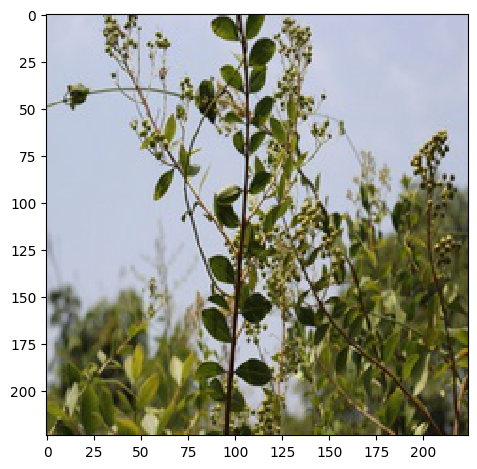

In [ ]:
#class_labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199]
image_path='/content/drive/MyDrive/dataset-new/TEST-WRITER-224/test/Lawsonia inermis/94.JPG'
class_labels = ['Abelmoschus sagittifolius','Abrus precatorius','Abutilon indicum','Acanthus integrifolius','Acorus tatarinowii','Agave americana','Ageratum conyzoides','Allium ramosum','Alocasia macrorrhizos','Aloe vera','Alpinia officinarum','Amomum longiligulare','Ampelopsis cantoniensis','Andrographis paniculata','Angelica dahurica','Ardisia sylvestris','Artemisia vulgaris','Artocarpus altilis','Artocarpus heterophyllus','Artocarpus lakoocha','Asparagus cochinchinensis','Asparagus officinalis','Averrhoa carambola','Baccaurea sp','Barleria lupulina','Bengal Arum','Berchemia lineata','Bidens pilosa','Bischofia trifoliata','Blackberry Lily','Blumea balsamifera','Boehmeria nivea','Breynia vitis','Caesalpinia sappan','Callerya speciosa','Callisia fragrans','Calophyllum inophyllum','Calotropis gigantea','Camellia chrysantha','Caprifoliaceae','Capsicum annuum','Carica papaya','Catharanthus roseus','Celastrus hindsii','Celosia argentea','Centella asiatica','Citrus aurantifolia','Citrus hystrix','Clausena indica','Cleistocalyx operculatus','Clerodendrum inerme','Clinacanthus nutans','Clycyrrhiza uralensis fish','Coix lacryma-jobi','Cordyline fruticosa','Costus speciosus','Crescentia cujete Lin','Crinum asiaticum','Crinum latifolium','Croton oblongifolius','Croton tonkinensis','Curculigo gracilis','Curculigo orchioides','Cymbopogon','Datura metel','Derris elliptica','Dianella ensifolia','Dicliptera chinensis','Dimocarpus longan','Dioscorea persimilis','Eichhoriaceae crassipes','Eleutherine bulbosa','Erythrina variegata','Eupatorium fortunei','Eupatorium triplinerve','Euphorbia hirta','Euphorbia pulcherrima','Euphorbia tirucalli','Euphorbia tithymaloides','Eurycoma longifolia','Excoecaria cochinchinensis','Excoecaria sp','Fallopia multiflora','Ficus auriculata','Ficus racemosa','Fructus lycii','Glochidion eriocarpum','Glycosmis pentaphylla','Gonocaryum lobbianum','Gymnema sylvestre','Gynura divaricata','helicteres hirsuta','Hemerocallis fulva','Hemigraphis glaucescens','Hibiscus mutabilis','Hibiscus rosa sinensis','Hibiscus sabdariffa','Holarrhena pubescens','Homalomena occulta','Houttuynia cordata','Imperata cylindrica','Iris domestica','Ixora coccinea','Jasminum sambac','Jatropha gossypiifolia','Jatropha multifida','Jatropha podagrica','Justicia gendarussa','Kalanchoe pinnata','Lactuca indica','Lantana camara','Lawsonia inermis','Leea rubra','Litsea Glutinosa','Lonicera dasystyla','Lpomoea sp','Maesa','Mallotus barbatus','Mangifera','Melastoma malabathricum','Mentha Spicata','Microcos tomentosa','Micromelum falcatum','Millettia pulchra','Mimosa pudica','Morinda citrifolia','Moringa oleifera','Morus alba','Mussaenda philippica','Nelumbo nucifera','Ocimum basilicum','Ocimum gratissimum','Ocimum sanctum','Oenanthe javanica','Ophiopogon japonicus','Paederia lanuginosa','Pandanus amaryllifolius','Pandanus sp','Pandanus tectorius','Parameria Laevigata','Passiflora foetida','Pereskia Sacharosa','Persicaria odorata','Phlogacanthus turgidus','Phrynium placentarium','Phyllanthus Reticulatus Poir','Piper betle','Piper sarmentosum','Plantago','Platycladus orientalis','Plectranthus amboinicus','Pluchea pteropoda Hemsl','Plukenetia volubilis','Plumbago indica','Plumeria rubra','Polyginum cuspidatum','Polyscias fruticosa','Polyscias guilfoylei','Polyscias scutellaria','Pouzolzia zeylanica','Premna serratifolia','Pseuderanthemum latifolium','Psidium guajava','Psychotria reevesii Wall','Psychotria rubra','Quisqualis indica','Rauvolfia','Rauvolfia tetraphylla','Rhinacanthus nasutus','Rhodomyrtus tomentosa','Ruellia tuberosa','Sanseviera canaliculata Carr','Sansevieria hyacinthoides','Sarcandra glabra','Sauropus androgynus','Schefflera heptaphylla','Schefflera venulosa','Senna alata','Sida acuta Burm','Solanum Mammosum','Solanum torvum','Spilanthes acmella','Spondias dulcis','Stachytarpheta jamaicensis','Stephania dielsiana','Stereospermum chelonoides','Streptocaulon juventas','Syzygium nervosum','Tabernaemontana divaricata','Tacca subflabellata','Tamarindus indica','Terminalia catappa','Tradescantia discolor','Trichanthera gigantea','Vernonia amygdalina','Vitex negundo','Xanthium strumarium','Zanthoxylum avicennae','Zingiber officinale','Ziziphus mauritiana']
class_name = os.path.basename(os.path.dirname(image_path))
Xi = skimage.io.imread(image_path)
Xi = skimage.transform.resize(Xi, (224,224))
Xi = (Xi - 0.5)*2 #Inception pre-processing
skimage.io.imshow(Xi/2+0.5) # Show image before inception preprocessing
np.random.seed(222)
preds = new_model.predict(Xi[np.newaxis, :, :, :])
top_pred_classes = preds[0].argsort()[-5:][::-1]  # Get top 5 predicted classes
true_label_index = class_labels.index(class_name)
print(true_label_index)
true_label = class_labels[true_label_index]
print("Image Class:", true_label)
print("Predicted Classes:", top_pred_classes)
first_pred_index = top_pred_classes[0]
first_pred_class = class_labels[first_pred_index]
second_pred_index = top_pred_classes[1]
second_pred_class = class_labels[second_pred_index]
print("First Predicted Class:", first_pred_class)
print("second Predicted Class:", second_pred_class)

In [ ]:

top_pred_classes = preds[0].argsort()[-5:][::-1]
top_pred_classes                #Index of top 5 classes

array([113,  79, 167,  96, 146])

Step 1: Create perturbations of image





For the case of image explanations, perturbations will be generated by turning on and off some of the superpixels in the image.


Extract super-pixels from image

Superpixels are generated using the quickshift segmentation algorithm. It can be noted that for the given image, 68 superpixels were generated. The generated superpixels are shown in the image below.


In [ ]:
superpixels = skimage.segmentation.quickshift(Xi, kernel_size=4,max_dist=200, ratio=0.2)
num_superpixels = np.unique(superpixels).shape[0]
num_superpixels

32

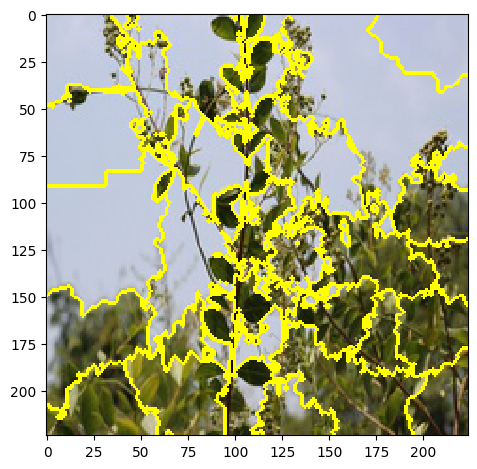

In [ ]:
skimage.io.imshow(skimage.segmentation.mark_boundaries(Xi/2+0.5, superpixels))

[link text](https://)
Create random perturbations

In this example, 150 perturbations were used. However, for real life applications, a larger number of perturbations will produce more reliable explanations. Random zeros and ones are generated and shaped as a matrix with perturbations as rows and superpixels as columns. An example of a perturbation (the first one) is show below. Here, 1 represent that a superpixel is on and 0 represents it is off. Notice that the length of the shown vector corresponds to the number of superpixels in the image.


In [ ]:
num_perturb = 150
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))
perturbations[0] #Show example of perturbation

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1])



The following function perturb_image perturbs the given image (img) based on a perturbation vector (perturbation) and predefined superpixels (segments).


In [ ]:
def perturb_image(img,perturbation,segments):
  active_pixels = np.where(perturbation == 1)[0]
  mask = np.zeros(segments.shape)
  for active in active_pixels:
      mask[segments == active] = 1
  perturbed_image = copy.deepcopy(img)
  perturbed_image = perturbed_image*mask[:,:,np.newaxis]
  return perturbed_image

\

Let's use the previous function to see what a perturbed image would look like:


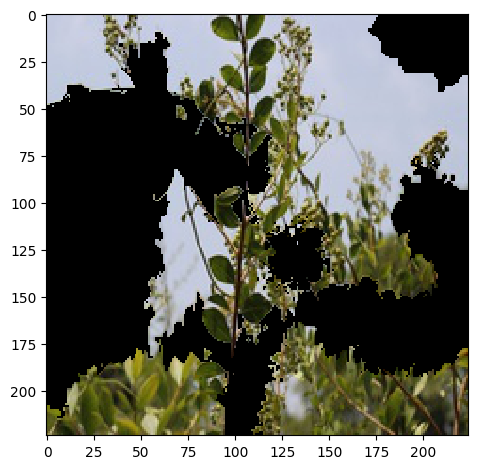

In [ ]:
skimage.io.imshow(perturb_image(Xi/2+0.5,perturbations[0],superpixels))


Step 2: Use ML classifier to predict classes of new generated images

This is the most computationally expensive step in LIME because a prediction for each perturbed image is computed. From the shape of the predictions we can see for each of the perturbations we have the output probability for each of the 1000 classes in Inception V3.


In [ ]:
predictions = []
for pert in perturbations:
  perturbed_img = perturb_image(Xi,pert,superpixels)
  pred = new_model(perturbed_img[np.newaxis,:,:,:])
  predictions.append(pred)

predictions = np.array(predictions)
predictions.shape

(150, 1, 200)


Step 3: Compute distances between the original image and each of the perturbed images and compute weights (importance) of each perturbed image

The distance between each randomly generated perturnation and the image being explained is computed using the cosine distance. For the shape of the distances array it can be noted that, as expected, there is a distance for every generated perturbation.


In [ ]:
original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled
distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()
distances.shape

(150,)


Use kernel function to compute weights

The distances are then mapped to a value between zero and one (weight) using a kernel function. An example of a kernel function with different kernel widths is shown in the plot below. Here the x axis represents distances and the y axis the weights. Depeding on how we set the kernel width, it defines how wide we want the "locality" around our instance to be. This kernel width can be set based on expected distance values. For the case of cosine distances, we expect them to be somehow stable (between 0 and 1); therefore, no fine tunning of the kernel width might be required.


In [ ]:
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
weights.shape

(150,)


Step 4: Use perturbations, predictions and weights to fit an explainable (linear) model

A weighed linear regression model is fitted using data from the previous steps (perturbations, predictions and weights). Given that the class that we want to explain is labrador, when fitting the linear model we take from the predictions vector only the column corresponding to the top predicted class. Each coefficients in the linear model corresponds to one superpixel in the segmented image. These coefficients represent how important is each superpixel for the prediction of labrador.


In [ ]:
class_to_explain = top_pred_classes[0]
simpler_model = LinearRegression()
simpler_model.fit(X=perturbations, y=predictions[:,:,class_to_explain], sample_weight=weights)
coeff = simpler_model.coef_[0]
coeff

array([ 2.03552904e-04, -2.15951114e-04,  1.60523262e-04,  6.82739891e-04,
       -4.52951336e-04,  9.79113491e-04, -5.43636275e-04, -1.88522235e-04,
       -4.91378495e-05,  1.71579477e-03,  4.74173307e-04,  1.65073131e-04,
       -5.42449896e-04,  7.76540823e-04,  3.31090850e-04, -5.66390849e-04,
        8.97316384e-04, -7.69730490e-06, -3.88944643e-04, -3.18484594e-04,
        3.00325703e-04,  4.64414428e-04,  1.81991846e-04, -2.20686144e-04,
        3.02169031e-04,  3.49741985e-04,  2.21434970e-04, -1.74758768e-04,
        3.72224877e-04,  3.86401842e-04,  3.85362274e-05, -3.48377759e-04])

**bold text**
Compute top features (superpixels)

Now we just need to sort the coefficients to figure out which are the supperpixels that have larger coefficients (magnitude) for the prediction of labradors. The identifiers of these top features or superpixels are shown below. Even though here we use the magnitude of the coefficients to determine the most important features, other alternatives such as forward or backward elimination can be used for feature importance selection.


In [ ]:
num_top_features = 8
top_features = np.argsort(coeff)[-num_top_features:]
top_features

array([29, 21, 10,  3, 13, 16,  5,  9])

<ipython-input-36-abf327fe99f7>:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  plt.imshow(superpixels == top_features[:, np.newaxis], cmap='hot', alpha=0.5)


TypeError: ignored

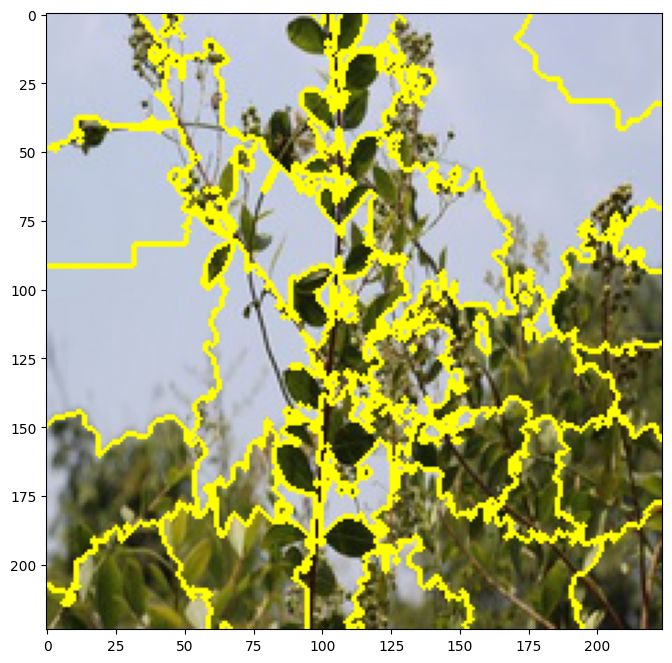

In [ ]:
import matplotlib.pyplot as plt

# Visualize top features
plt.figure(figsize=(8, 8))
plt.imshow(skimage.segmentation.mark_boundaries(Xi / 2 + 0.5, superpixels))
plt.imshow(superpixels == top_features[:, np.newaxis], cmap='hot', alpha=0.5)
plt.axis('off')
plt.title('Top Features')
plt.show()



Show LIME explanation (image with top features)

Let's show the most important superpixels defined in the previous step in an image after covering up less relevant superpixels.


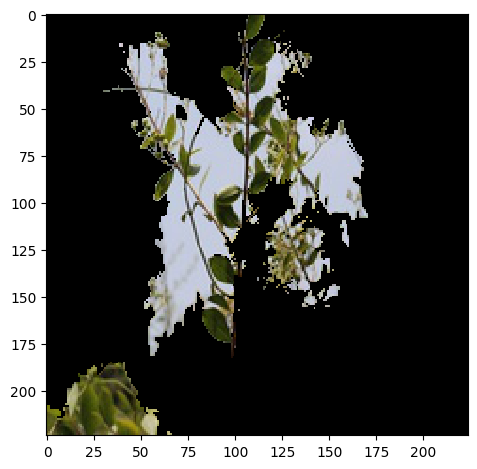

In [ ]:
mask = np.zeros(num_superpixels)
mask[top_features]= True #Activate top superpixels
skimage.io.imshow(perturb_image(Xi/2+0.5,mask,superpixels) )

This is the final step where we obtain the area of the image that produced the prediction of labrador. You can download this notebook and perhaps test your own images to obtain explanations for your classification tasks. Also, you can use link at the beggining of the notebook to open and test it in the Google Colab environment without having to install anything in your computer.